# Laboratorio Integrador #4

En el siguiente laboratorio analizaremos dos casos de estudios diferentes:

1.   Análisis de Electrocardiogramas (ECG) usando técnicas no supervisadas (time series clustering - kshape algorithm) en un dataset de baja numerosidad
2.   Análisis de propagación de estiquetas usando técnicas semisupervisadas (label propagation, label spreading) en un dataset de baja numerosidad.

Objetivo:
*   Aplicar el k-shape algorithm sobre un dataset de ECG de baja dimensionalidad y determinar la efectividad de la clusterización basado en la forma.
*   Aplicar varias técnicas semisuvrersidad par etiquetar un dataset de baja numerosidad y medir el desempeño del etiquetado.
*   Presentar un análisis de desepeño de clasificación para cada caso de estudio.

*Caso estudio del k-shape:*
1.   Tarea individual.
2.   Implementar una arquitectura k-shape y aplicarla al dataset  ECG200 (200 instancias y 2 clases) (https://www.timeseriesclassification.com/description.php?Dataset=ECG200).
3.   Realizar un flujo experimental que permita entrenar el modelo y evaluar la calidad de clusterización en el entrenamiento y en el test externo.
4.   Realizar un análisis de resultados de entrenamiento y prueba (viualizar los clusters, métricas no supervisadas y algunas supervisadas).
5.   Subir a la carpeta de trabajo en el D2L, el cuaderno desarrollado.

*Caso estudio del label propagation and spreading:*
1.   Tarea individual.
2.   Implementar las arquitecturas label propagation and spreading y aplicarla al dataset  *Letter Recognition* (800 approx. instancias por clase) y 26 clases (A-Z) (https://archive.ics.uci.edu/dataset/59/letter+recognition). Del dataset presentado, escoger 5 clases aleatorias para minimizar el impacto de clasificación multiclase. Procesar el dataset para dejar sólo 10 puntos etiquetados por clase (5 clases aleatorias).
3.   Aplicar los modelos de label propagation and spreading al dataset preprocesado y visualizar los resultados de propagación usando una técnica T-SNE en dos dimensionaes.
4.   Entrenar un modelo de clasifiación supervisado con el nuevo dataset etiquetado y medir el desempeño de clasificación. Esto es un problema de clasificación multiclase.
5.   Realizar un análisis de resultados entre los modelos de etiquetado.
6.   Subir a la carpeta de trabajo en el D2L, el cuaderno desarrollado.

+1punto: Aplicar y Clasificar la propagación de etiquetas en un espacio latente reducido por AEs o técnicas no lineales. 

Valor:
*   25 puntos (14.5 por cada caso estudio)

Penalizaciones:
*   Cualquier error de implementación o concepto, se penalizará con -1 punto (acumulativo).
*   La no realización de la implementación y aplicación se penalizará con el 40%
*   La no realización de un análisis de discusión de resultados se penalizará con el 40%
*   La no realización conclusiones se penalizará con el 20%
*   La no realización de la entrega de la actividad se penalizará con el 100%


In [ ]:
#!pip install tslearn
#! pip install matplotlib

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset

### Load data and exploration

In [21]:
# Cargar los datasets
data_train = np.loadtxt("C:/Users/ASUS/Documents/Maestria/Semana_4_ANS/ECG200/ECG200_TRAIN.txt", delimiter=None)
X_train = to_time_series_dataset(data_train[:, 1:])
y_train = data_train[:, 0].astype(int)
data_test = np.loadtxt("C:/Users/ASUS/Documents/Maestria/Semana_4_ANS/ECG200/ECG200_TEST.txt", delimiter=None)
X_test = to_time_series_dataset(data_test[:, 1:])
y_test = data_test[:, 0].astype(int)

In [22]:
# Escalar las series temporales para la media y la varianza
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Estandarizar para tener media 0 y varianza 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\ASUS\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [23]:
# Estadísticas básicas
print("Número de series temporales:", len(data_train))
print("Número de clases únicas:", len(np.unique(data_train[:,0])))
print("Longitud de las series temporales:", len(data_train[0,1:]))

Número de series temporales: 100
Número de clases únicas: 2
Longitud de las series temporales: 96


In [25]:
# Número de ejemplos por clase en el conjunto de entrenamiento
print("Número de series temporales en clase 1.0:", len(data_train[data_train[:,0]==1.0]))
print("Número de series temporales en clase 2.0:", len(data_train[data_train[:,0]==-1.0]))

Número de series temporales en clase 1.0: 69
Número de series temporales en clase 2.0: 31


In [33]:
# Inicializar el modelo K-Shape
n_clusters = len(np.unique(y_train))
ks = KShape(n_clusters=n_clusters, n_init=1, random_state=0)

# Ajustar el modelo
y_pred_train = ks.fit_predict(X_train_scaled)

# Predecir los clusters
y_pred_test = ks.predict(X_train_scaled)

c:\Users\ASUS\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ASUS\.conda\envs\uni\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  

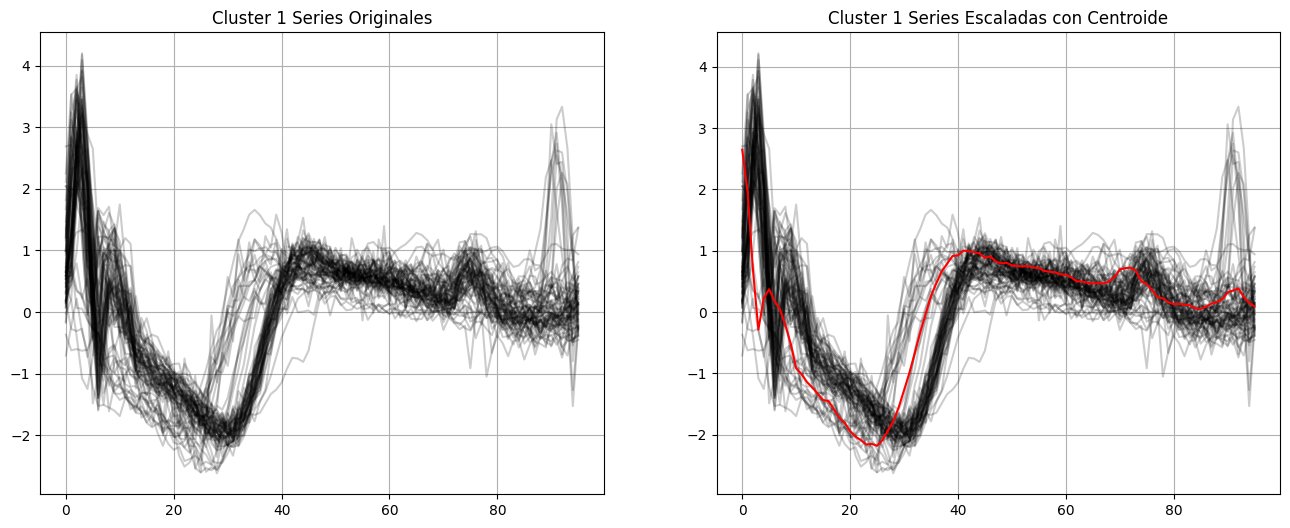

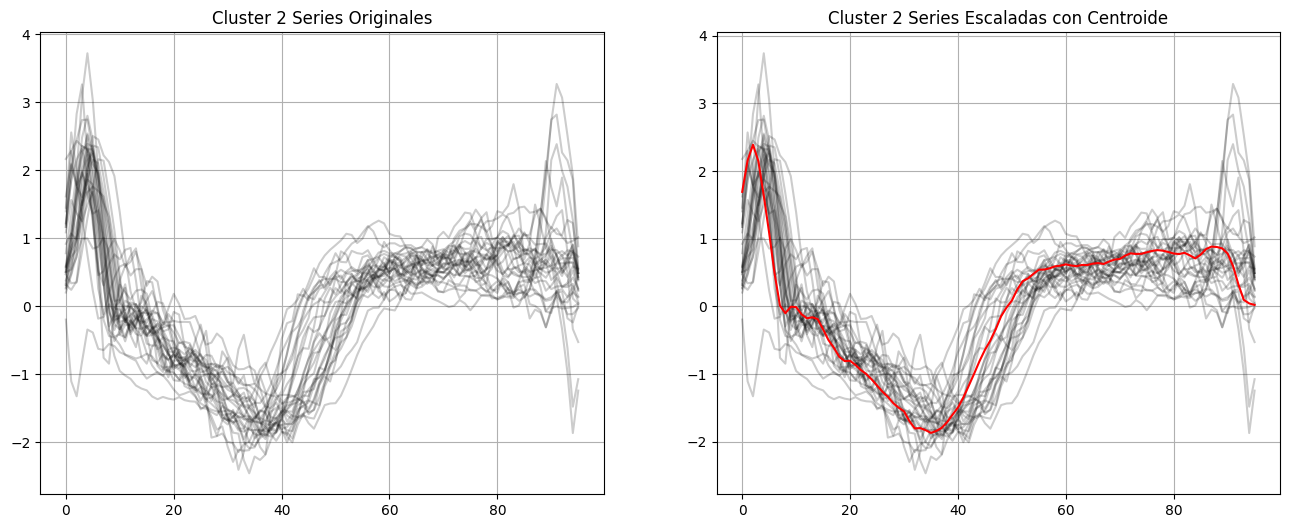

In [35]:
# Visualizar los centroides de los clusters y las series originales
for yi in range(n_clusters):
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    plt.title(f"Cluster {yi + 1} Series Originales")
    for xx in X_train[y_pred_train == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.title(f"Cluster {yi + 1} Series Escaladas con Centroide")
    for xx in X_train_scaled[y_pred_train == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.grid(True)
    
    plt.show()

### Caso estudio 1: Clusterización en series temporales

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Métricas no supervisadas
print("Entrenamiento:")
print("ARI:", adjusted_rand_score(y_train, y_pred_train))
print("NMI:", normalized_mutual_info_score(y_train, y_pred_train))

print("\nPrueba:")
print("ARI:", adjusted_rand_score(y_test, y_pred_test))
print("NMI:", normalized_mutual_info_score(y_test, y_pred_test))


Entrenamiento:
ARI: 0.2458212694640309
NMI: 0.14512630458822537

Prueba:
ARI: -0.018289900270691713
NMI: 0.0035294743119593723


In [37]:
from scipy.stats import mode

def map_clusters_to_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in np.unique(y_pred):
        mask = (y_pred == i)
        labels[mask] = mode(y_true[mask])[0]
    return labels

mapped_train = map_clusters_to_labels(y_train, y_pred_train)
mapped_test = map_clusters_to_labels(y_test, y_pred_test)

print("\nAccuracy supervisado:")
print("Train Accuracy:", accuracy_score(y_train, mapped_train))
print("Test Accuracy:", accuracy_score(y_test, mapped_test))



Accuracy supervisado:
Train Accuracy: 0.76
Test Accuracy: 0.64


#### Análisis de resultados

#### Conclusiones

### Caso estudio 2: Propagacíon de etiquetas semi-supervisada

In [40]:
# CARGAR DATOS 
import pandas as pd

# Leer el archivo txt
df = pd.read_csv("C:/Users/ASUS/Documents/Maestria/Semana_4_ANS/letter+recognition/letter-recognition.data", header=None)

# Asignar nombres de columna
df.columns = ['Label'] + [f'Feature {i}' for i in range(1, df.shape[1])]

# Mostrar el DataFrame
print(df)


      Label  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0         T          2          8          3          5          1          8   
1         I          5         12          3          7          2         10   
2         D          4         11          6          8          6         10   
3         N          7         11          6          6          3          5   
4         G          2          1          3          1          1          8   
...     ...        ...        ...        ...        ...        ...        ...   
19995     D          2          2          3          3          2          7   
19996     C          7         10          8          8          4          4   
19997     T          6          9          6          7          5          6   
19998     S          2          3          4          2          1          8   
19999     A          4          9          6          6          2          9   

       Feature 7  Feature 8

#### Análisis de resultados

In [53]:
import random
import string
# Obtener 5 letras aleatorias del alfabeto (en mayúsculas)
random.seed(42)
letras_aleatorias = random.sample(string.ascii_uppercase, 5)

# Mostrar las letras seleccionadas
print("Letras seleccionadas:", letras_aleatorias)
total=[]
# Filtrar e imprimir por cada letra
for letra in letras_aleatorias:
    df_sample = df[df["Label"] == letra]
    total.append(df_sample)
df_total = pd.concat(total, ignore_index=True)
print(df_total)

Letras seleccionadas: ['U', 'D', 'A', 'X', 'I']
     Label  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0        U          7         11          8          9          4          3   
1        U          4          7          4          5          2          7   
2        U          5          6          5          4          2          5   
3        U          3          3          3          1          1          5   
4        U          5          7          6          5          5          8   
...    ...        ...        ...        ...        ...        ...        ...   
3944     I          3          9          5          6          6         10   
3945     I          1          3          1          2          1          7   
3946     I          2          5          0          7          0          7   
3947     I          1          5          1          4          1          8   
3948     I          5         12          5          6          3       

In [ ]:
muestras_10 = []
indices_a_quitar = []

for letra in letras_aleatorias:
    df_letra = df_total[df_total["Label"] == letra]
    # Tomar muestra del 10%
    muestra = df_letra.sample(frac=0.1, random_state=42)
    # Guardar la muestra
    muestras_10.append(muestra)
    # Guardar los índices de las filas para eliminar
    indices_a_quitar.extend(muestra.index)

# DataFrame con el 10%
df_10 = pd.concat(muestras_10, ignore_index=True)

# Eliminar esas filas del df_total original
df_total_filtrado = df_total.drop(index=indices_a_quitar).reset_index(drop=True)

# Mostrar resultados
print("\n➡️ 10% de cada letra (df_10):")
print(df_10)

print("\n➡️ 90% restante (df_total_filtrado):")
print(df_total_filtrado)


➡️ 10% de cada letra (df_10):
    Label  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0       U          3          3          4          2          1          7   
1       U          7         11          8          8          5          3   
2       U          4          7          6          5          5          9   
3       U          3          7          4          5          3          7   
4       U          2          0          2          1          1          8   
..    ...        ...        ...        ...        ...        ...        ...   
390     I          7          8          9          9          8          7   
391     I          1          5          0          7          0          7   
392     I          5          8          6          6          4          7   
393     I          3          9          4          7          2          7   
394     I          1          5          0          6          0          7   

     Feature 7  Feat

#### Conclusiones

## +1 Punto